# Import Libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# Exploratory Data Analysis

In [2]:
data = pd.read_csv('beer-servings.csv', index_col=False)

In [3]:
data.shape

(193, 7)

In [4]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [5]:
data = data.iloc[:, 1:]

In [6]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


# Data Cleaning/Preprocessing

## Duplicate Row Removal

In [7]:
data.duplicated().sum()

np.int64(0)

## Check Missing values

In [8]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


## Splitting Numerical and Categorical Columns

In [9]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

## Check histogram of Numerical features for data imputation

['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


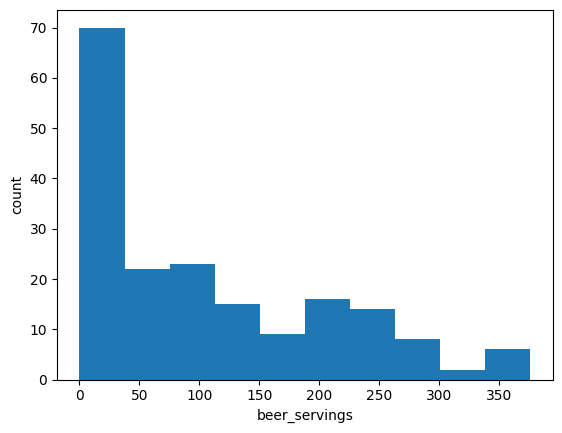

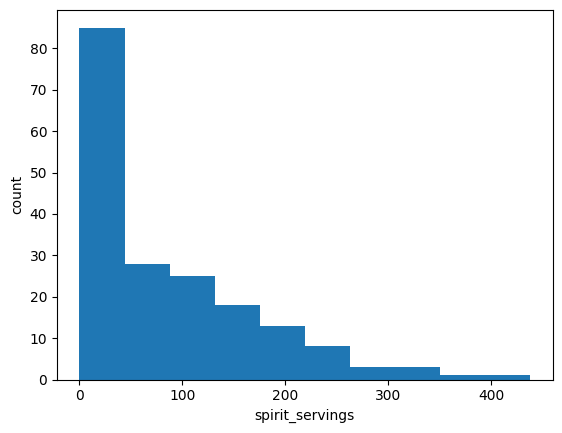

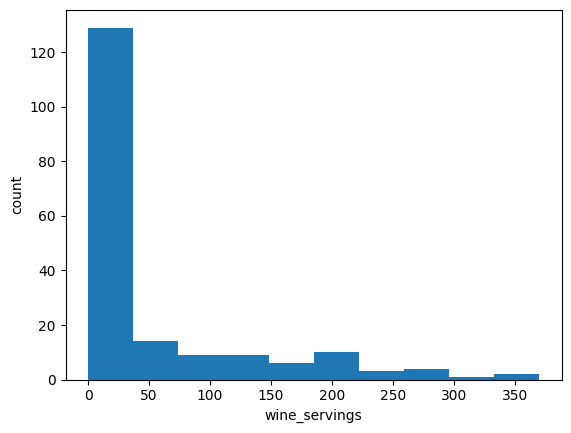

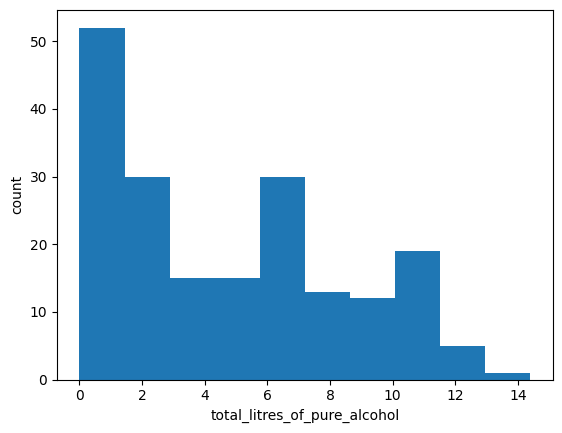

In [10]:
num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_df[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [11]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [12]:
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


## Outlier Handling

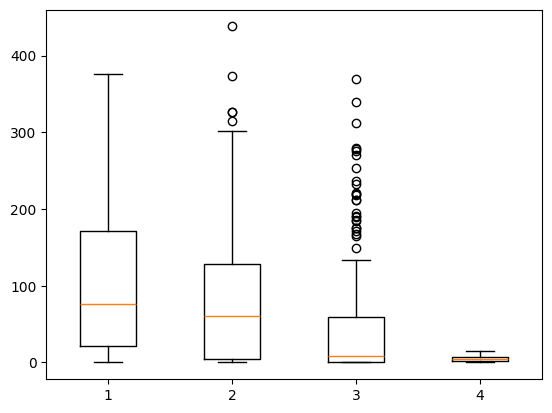

In [13]:
plt.boxplot(num_df)
plt.show()

In [14]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [15]:
for col in num_cols:
  num_df[col] = replace_outliers_with_upper_bound(num_df, col)

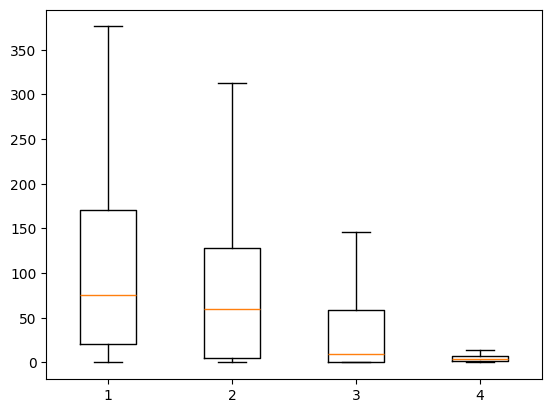

In [16]:
plt.boxplot(num_df)
plt.show()

## Data Normalization

In [17]:
num_df.head(2)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9


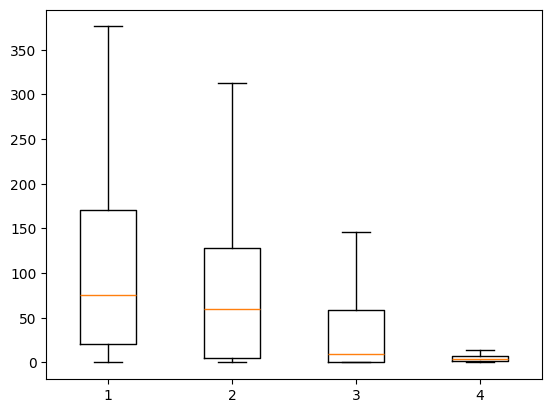

In [18]:
plt.boxplot(num_df)
plt.show()

In [19]:
for col in num_cols[:-1]:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

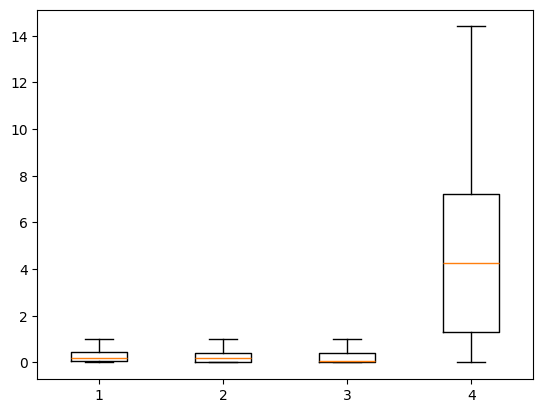

In [20]:
plt.boxplot(num_df)
plt.show()

## Encoding of Categorical Variables

In [21]:
cat_df.head(2)

,country,continent
0,Afghanistan,Asia
1,Albania,Europe


In [22]:
cat_cols = cat_df.columns.tolist()

In [23]:
for col in cat_cols:
  print(cat_df[col].value_counts())

country
Afghanistan    1
Albania        1
Algeria        1
Andorra        1
Angola         1
              ..
Venezuela      1
Vietnam        1
Yemen          1
Zambia         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64
continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64


In [24]:
for col in cat_cols:
  encoder = LabelEncoder()
  cat_df[col] = encoder.fit_transform(cat_df[col])

In [25]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [26]:
final_df = pd.concat([num_df, cat_df], axis=1)

In [27]:
final_df.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.000000,0.0000,0.000000,0.0,0,1
1,0.236702,0.4224,0.369863,4.9,1,2
2,0.066489,0.0000,0.095890,0.7,2,0
3,0.651596,0.4416,1.000000,12.4,3,2
4,0.577128,0.1824,0.308219,5.9,4,0


# Separate Features and Labels

In [28]:
y = final_df["total_litres_of_pure_alcohol"]
X = final_df.drop("total_litres_of_pure_alcohol", axis=1)

# Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

## Linear Regression

In [36]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

## Ridge Regression

In [37]:
ridge = Ridge(alpha=1.0)  # Set alpha to control regularization strength
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

## Lasso Regression

In [38]:
lasso = Lasso(alpha=0.1)  # Set alpha to control regularization strength
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Model Evaluation

In [39]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

Mean Squared Error: 1.712256427108262
R-squared: 0.8934105762754398


In [43]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

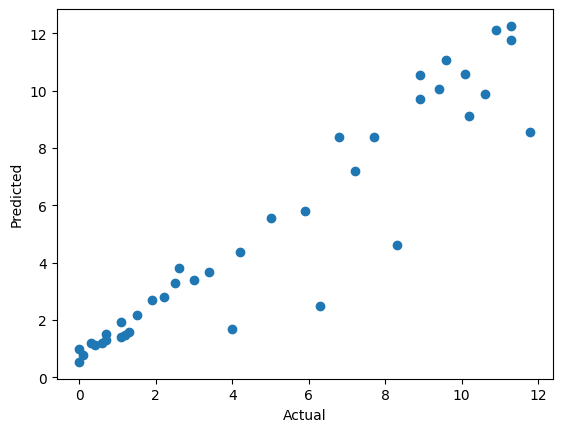

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [45]:
result_df = pd.DataFrame(columns=["Model", "Metric", "Value"])
result_df.loc[len(result_df)] = ["Linear Regression", "MSE", mse]
result_df.loc[len(result_df)] = ["Linear Regression", "R2", r2]
result_df.loc[len(result_df)] = ["Lasso Regression", "MSE", lasso_mse]
result_df.loc[len(result_df)] = ["Lasso Regression", "R2", lasso_r2]
result_df.loc[len(result_df)] = ["Ridge Regression", "MSE", ridge_mse]
result_df.loc[len(result_df)] = ["Ridge Regression", "R2", ridge_r2]
result_df

,Model,Metric,Value
0,Linear Regression,MSE,1.712256
1,Linear Regression,R2,0.893411
2,Lasso Regression,MSE,1.686835
3,Lasso Regression,R2,0.894993
4,Ridge Regression,MSE,1.513897
5,Ridge Regression,R2,0.905759
